## 시스템 해석

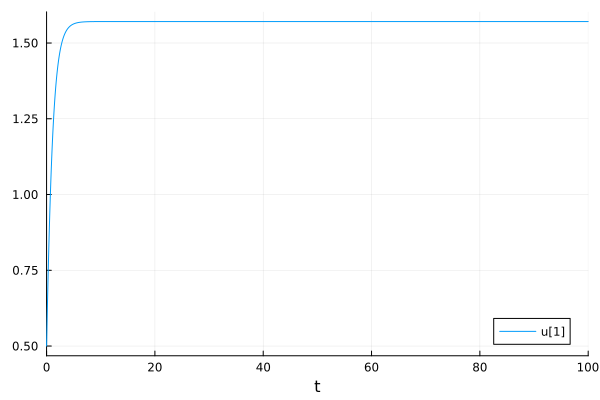

In [18]:
using DifferentialEquations

# ODE 정의
function myODE(u, p, t)
    return r * K / 
end

# 초기 조건, 매개변수, 타임스팬 설정
u0 = 0.5
tspan = (0.0, 100.0)

# ODEProblem 객체 생성
prob = ODEProblem(myODE, u0, tspan)

# Euler 방법을 사용하여 고정 타임스텝으로 솔버 설정
sol = solve(prob, Euler(), dt=0.01, p = 3)

# 결과 출력
using Plots
plot(sol)

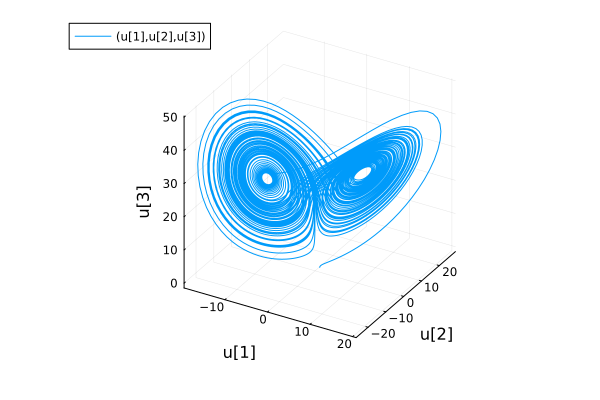

In [25]:
using DifferentialEquations, Plots

# ODE 정의
function myODE(du, u, p, t)
    du[1] = p[1] * (u[2] - u[1])
    du[2] = u[1] * (p[2] - u[3]) - u[2]
    du[3] = u[1] * u[2] - p[3] * u[3]
end

# 초기 상태, 매개변수, 시간 범위 설정
u0 = [1.10, 0.0, 0.0]
p = [10.0, 28.0, 7/3]
tspan = (0.0, 100.0)

# ODEProblem 생성 및 해결
prob = ODEProblem(myODE, u0, tspan, p,dt=0.1)
sol = solve(prob)

# 해 플로팅
plot(sol, vars=(1,2,3))  # vars 인자는 플롯할 변수를 선택합니다.


In [1]:
fig, ax = plt.subplots(figsize=(16,16))
def system(t, y):
    v, w = y
    dv = mu * v + w - v**2
    dw = -v + mu * w + 2 * v**2
    dv *= (np.abs(v) < 2.0) * (np.abs(w) < 2.0)
    dw *= (np.abs(v) < 2.0) * (np.abs(w) < 2.0)
    return [dv, dw]
def system_reversed(t, y):
    v, w = y
    dv = mu * v + w - v**2
    dw = -v + mu * w + 2 * v**2
    dv *= (np.abs(v) < 2.0) * (np.abs(w) < 2.0)
    dw *= (np.abs(v) < 2.0) * (np.abs(w) < 2.0)
    return [-dv, -dw]
x_root = (mu**2+1)/(2+mu)
y_root = -mu * x_root + x_root ** 2
vmin, vmax, wmin, wmax = -0.4,0.4,-0.4,0.4
# Hopf bifurcation circle
if mu > 0:
    thetas = np.linspace(0, 2*np.pi, 1000)
    xs = np.sqrt(2*mu) * np.cos(thetas)
    ys = -np.sqrt(2*mu) * np.sin(thetas)
    ax.plot(xs, ys, color='r', linewidth=1, label="$\mu^{1/2}$ order")  
    xs += mu * (2-2/3 * np.sin(2*thetas)-2/3 * np.cos(2*thetas))
    ys += mu * (1+4/3*np.sin(2*thetas) - 1/3*np.cos(2*thetas))
    ax.plot(xs, ys, color='b', linewidth=1, label="$\mu$ order")  
    xs += mu**1.5 / np.sqrt(72) * (5 * np.sin(3*thetas) - np.cos(3*thetas))
    ys += mu**1.5 / np.sqrt(72) * (36 * np.sin(thetas) + 28 * np.cos(thetas) - 5 * np.sin(3*thetas) + 7 * np.cos(3*thetas))
    ax.plot(xs, ys, color='k', linewidth=1, label="$\mu^{3/2}$ order")  
    radius = xs[0]
t_span = np.array([0, 14])
trajectory_resolution = 10
epsilon = 0.01
initial_conditions = []
initial_conditions += [(x, 0)  for x in np.linspace(vmin, vmax, trajectory_resolution)]
initial_conditions_2 = []
if mu > 0:
  initial_conditions_2 = [(radius *(1 + dx), 0) for dx in np.linspace(-0.08, 0.08, 5)]
sols = {}
sols_2 = {}
for ic in initial_conditions:
    sols[ic] = solve_ivp(system, [0,50], ic, dense_output=True, max_step=0.05)
for ic in initial_conditions_2:
    sols_2[ic] = solve_ivp(system, [0, min(0.1 * t_span[1]/mu, 200)], ic, dense_output=True, max_step=0.05)
vs = np.linspace(vmin, vmax, 200)
v_axis = np.linspace(vmin, vmax, 20)
w_axis = np.linspace(wmin, wmax, 20)

v_values, w_values = np.meshgrid(v_axis, w_axis)
dv, dw = system(0, [v_values, w_values])
# integral curves
# ax.scatter([x for x, y in initial_conditions_2], [y for x, y in initial_conditions_2])
for ic in initial_conditions:
  sol = sols[ic]
  ax.plot(sol.y[0], sol.y[1],alpha=0.2, linewidth=0.5, color='k')
for ic in initial_conditions_2:
  sol = sols_2[ic]
  ax.plot(sol.y[0], sol.y[1],alpha=0.3, linewidth=0.5, color='g')
# vector fields
arrow_lengths = np.sqrt(dv**2 + dw**2)
alpha_values = 1 - (arrow_lengths / np.max(arrow_lengths))**0.4
ax.quiver(v_values, w_values, dv, dw, color='blue', linewidth=0.5, scale=25, alpha=alpha_values)
ax.set_title(f'Hopf Bifurcation Model\n$\mu={mu:.4f})
# ax.legend()
ax.set_xlim(vmin, vmax)
ax.set_ylim(wmin, wmax)
ax.legend(loc='lower left')
# ax.set_xticks([])
# ax.set_yticks([])
dir_path = f"./hopf_3"
if not os.path.exists(dir_path):
  os.makedirs(dir_path)
fig.savefig(f"{dir_path}/{i}.png")
# plt.show()
plt.close()

SyntaxError: unterminated string literal (detected at line 64) (2843513833.py, line 64)